## Importing the various packages we'll require

In [1]:
import pandas as pd
import numpy as np
import datetime
df = pd.read_csv("sampled_flights_total.csv")

C:\Users\Kristopher\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [41]:
import seaborn as sns
import matplotlib as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [4]:
airlines_names = pd.read_csv('airline_names.csv')

In [5]:
airlines_names

,IATA_CODE,airline
0,WN,Southwest Airlines Co.
1,YV,Mesa Airlines
2,EV,EVA Air
3,HA,Hawaii Airlines
4,MQ,Envoy Airlines
5,EM,Empire Airlines
6,NK,Spirit Airlines
7,OH,Comair
8,AA,American Airlines Inc.
9,YX,Midwest Airlines


In [7]:
abbr_companies = airlines_names.set_index('IATA_CODE')['airline'].to_dict()

In [8]:
import matplotlib as plt

#### Quick rundown of the dtypes we're working with 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997830 entries, 0 to 1997829
Data columns (total 42 columns):
 #   Column               Dtype  
---  ------               -----  
 0   fl_date              object 
 1   mkt_unique_carrier   object 
 2   branded_code_share   object 
 3   mkt_carrier          object 
 4   mkt_carrier_fl_num   int64  
 5   op_unique_carrier    object 
 6   tail_num             object 
 7   op_carrier_fl_num    int64  
 8   origin_airport_id    int64  
 9   origin               object 
 10  origin_city_name     object 
 11  dest_airport_id      int64  
 12  dest                 object 
 13  dest_city_name       object 
 14  crs_dep_time         int64  
 15  dep_time             float64
 16  dep_delay            float64
 17  taxi_out             float64
 18  wheels_off           float64
 19  wheels_on            float64
 20  taxi_in              float64
 21  crs_arr_time         int64  
 22  arr_time             float64
 23  arr_delay            float64
 24

In [10]:
df['dep_delay'].replace('', np.nan, inplace=True) # Replacing nan values with '' in dep_delay
df['dep_delay'].isna().mean()

0.01677820435172162

In [11]:
df['arr_delay'].replace('', np.nan, inplace=True) # Replacing nan values with '' in arr_delay
df['arr_delay'].isna().mean()

0.019762442249841077

- About 1.67% of our values are empty - these flights were cancelled, so we'll drop them for this analysis

In [19]:
df.dropna(subset=['dep_delay'], inplace=True)

In [20]:
df.dropna(subset=['dep_delay'], inplace=True) # Dropping in place if continue Na
df.dropna(subset=['arr_delay'], inplace=True) # Dropping in place if continue Na

In [21]:
print(df['dep_time'].isnull().sum() * 100 / len(df), df['arr_time'].isnull().sum() * 100 / len(df)) # Checking new amount - essentially negligble

0.00010215688948616618 0.00010215688948616618


#### Creating a column titled "total_delay"

##### - This is a the difference between departure delay, and arrival delay

In [24]:
df['time_saved'] = df['dep_delay'] - df['arr_delay']
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,time_saved
0,2019-11-11,WN,WN,WN,410,WN,N7842A,410,13495,MSY,...,1062.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,2019-11-11,WN,WN,WN,2149,WN,N420WN,2149,13495,MSY,...,604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


#### There's no real outliers with this data unfortunately, except maybe values above and below 450 minutes in total delay.

#### - We'll remove those initially for this exploratory analysis

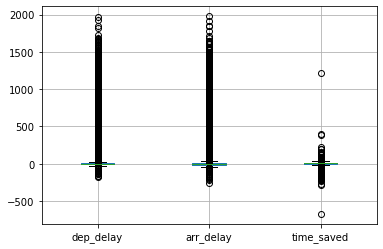

In [25]:
boxplot = df.boxplot(column=['dep_delay', 'arr_delay', 'time_saved'])


In [26]:
indexNames = df[df['time_saved'] <= -350].index
indexNames1 = df[df['time_saved'] >=350].index

In [27]:
print(indexNames, indexNames1)

Int64Index([262756], dtype='int64') Int64Index([491871, 864683, 1716700], dtype='int64')


In [28]:
df.drop(indexNames, inplace=True)

In [29]:
df.drop(indexNames1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957769 entries, 0 to 1997829
Data columns (total 42 columns):
 #   Column               Dtype  
---  ------               -----  
 0   fl_date              object 
 1   mkt_unique_carrier   object 
 2   branded_code_share   object 
 3   mkt_carrier          object 
 4   mkt_carrier_fl_num   int64  
 5   op_unique_carrier    object 
 6   tail_num             object 
 7   op_carrier_fl_num    int64  
 8   origin_airport_id    int64  
 9   origin               object 
 10  origin_city_name     object 
 11  dest_airport_id      int64  
 12  dest                 object 
 13  dest_city_name       object 
 14  crs_dep_time         int64  
 15  dep_time             float64
 16  dep_delay            float64
 17  taxi_out             float64
 18  wheels_off           float64
 19  wheels_on            float64
 20  taxi_in              float64
 21  crs_arr_time         int64  
 22  arr_time             float64
 23  arr_delay            float64
 24

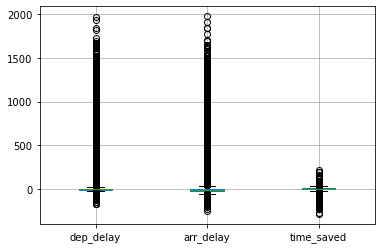

In [31]:
boxplot = df.boxplot(column=['dep_delay', 'arr_delay', 'time_saved'])

#### Next we're creating columns with the year, month, and day for each flight to make them easier to work with

In [32]:
df['year'] = pd.DatetimeIndex(df['fl_date']).year
df['month'] = pd.DatetimeIndex(df['fl_date']).month
df['day'] = pd.DatetimeIndex(df['fl_date']).day

In [33]:
df['fl_date'] = pd.to_datetime(df.fl_date) # Just changing fl_date to Datetime (this will be important later)

In [34]:
df['day_wk'] = df['fl_date'].dt.dayofweek # Finally, a new column with the day of the week

In [35]:
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,time_saved,year,month,day,day_wk
0,2019-11-11,WN,WN,WN,410,WN,N7842A,410,13495,MSY,...,NaN,NaN,NaN,NaN,NaN,10.0,2019,11,11,0
1,2019-11-11,WN,WN,WN,2149,WN,N420WN,2149,13495,MSY,...,NaN,NaN,NaN,NaN,NaN,10.0,2019,11,11,0


In [36]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [37]:
import matplotlib

In [38]:
global_stats = df['dep_delay'].groupby(df['mkt_unique_carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
mkt_unique_carrier,,,,
VX,-22.0,253.0,2080.0,5.751923
HA,-63.0,1114.0,22928.0,1.319086
G4,-53.0,1486.0,24965.0,11.456519
F9,-33.0,901.0,31436.0,16.881314
NK,-29.0,1380.0,47037.0,10.096987
B6,-31.0,1458.0,74602.0,16.607182
AS,-48.0,818.0,105700.0,3.704494
WN,-49.0,620.0,333131.0,10.546350
UA,-120.0,1690.0,378980.0,12.892203


<AxesSubplot:xlabel='mkt_unique_carrier'>

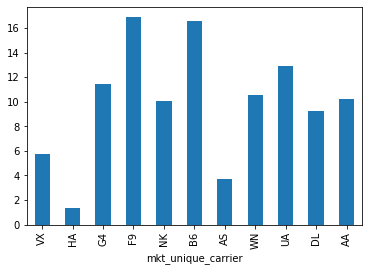

In [57]:
global_stats['mean'].plot(kind='bar')

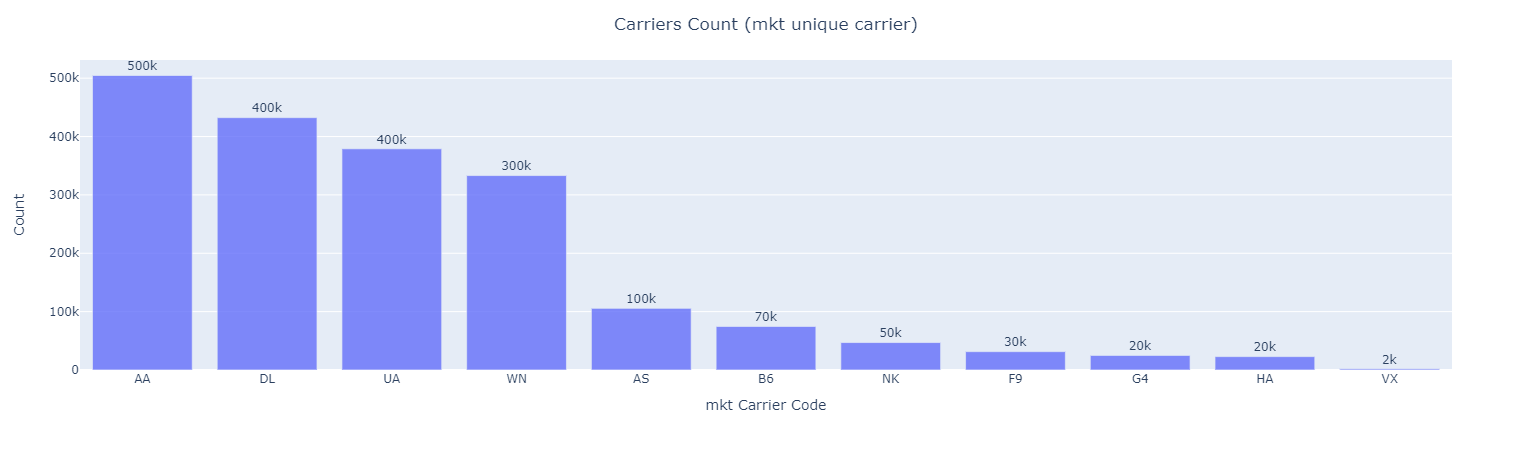

In [52]:
#prepare the data
df_carieer = pd.DataFrame(df['mkt_unique_carrier'].value_counts().reset_index().values, columns=["mkt_unique_carrier", "AggregateOP"])
# df_carieer = df_carieer.sort_index(axis = 0, ascending=True)
df_carieer= df_carieer.sort_values('AggregateOP',ascending=False)

fig = px.bar(df_carieer, y='AggregateOP', x='mkt_unique_carrier', text='AggregateOP', opacity = 0.8)
fig.update_traces(texttemplate='%{text:.1s}', textposition='outside')
fig.update_layout(uniformtext_minsize=4, uniformtext_mode='hide', title_x = 0.5,title_text='Carriers Count (mkt unique carrier)', yaxis=dict(title='Count'),
                  xaxis=dict(title='mkt Carrier Code'))

fig.show()

In [43]:
df_Org = pd.DataFrame(df['origin'].value_counts().reset_index().values, columns=["origin", "AggregateOrigin"])
df_dest = pd.DataFrame(df['dest'].value_counts().reset_index().values, columns=["dest", "AggregateDest"])

In [44]:
df_dest = df_dest.sort_values('AggregateDest',ascending=False).head(10)
df_dest = df_dest.sort_values('AggregateDest',ascending=True)

In [45]:
df_Org = df_Org.sort_values('AggregateOrigin',ascending=False).head(10)
df_Org = df_Org.sort_values('AggregateOrigin',ascending=True)

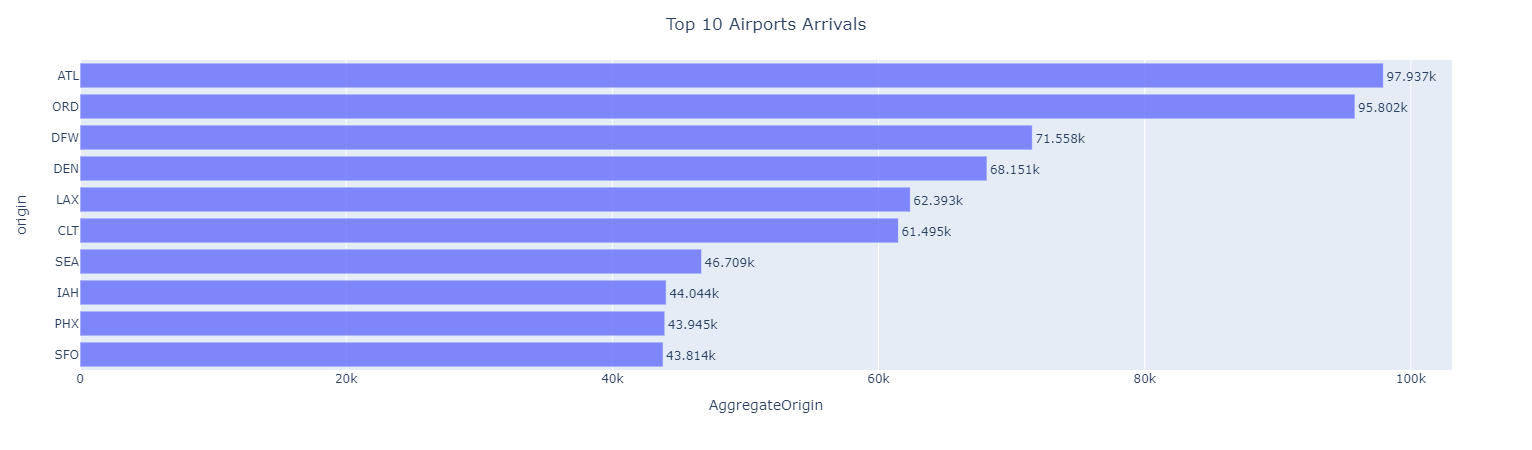

In [48]:
fig = px.bar(df_Org, x='AggregateOrigin', y='origin', text='AggregateOrigin', orientation ='h',opacity = 0.8)
fig.update_traces(texttemplate='%{text:.5s}', textposition='outside')
fig.update_layout(uniformtext_minsize=4, uniformtext_mode='hide', title_text='Top 10 Airports Arrivals', title_x = 0.5)

fig.show()

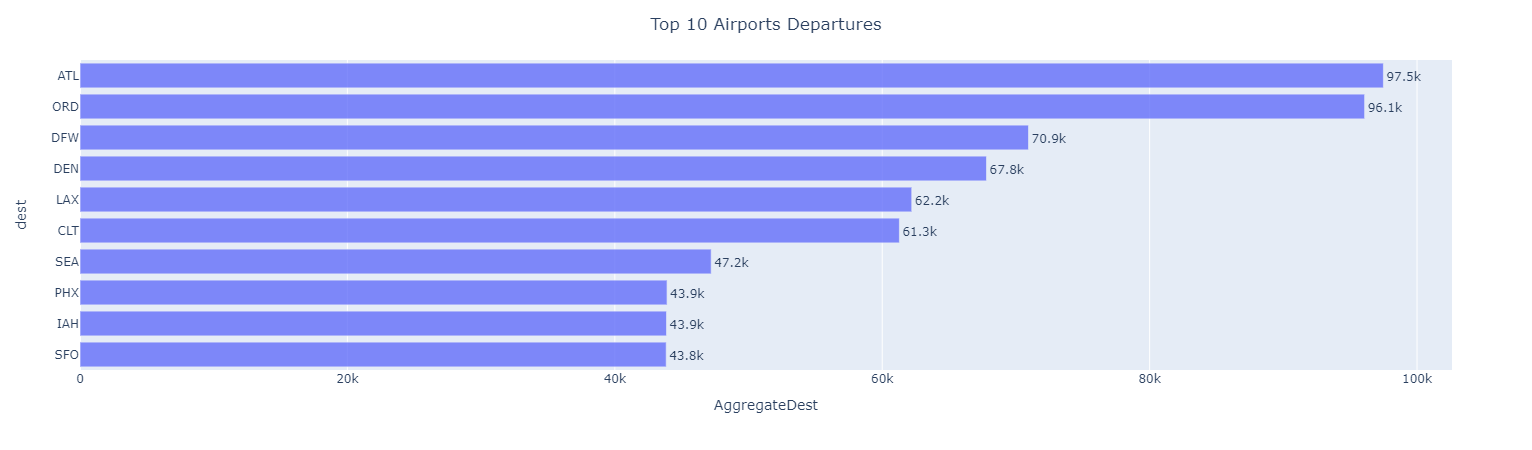

In [53]:
fig = px.bar(df_dest, x='AggregateDest', y='dest', text='AggregateDest', orientation ='h',opacity = 0.8)
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(uniformtext_minsize=4, uniformtext_mode='hide', title_text='Top 10 Airports Departures', title_x = 0.5)
fig.show()


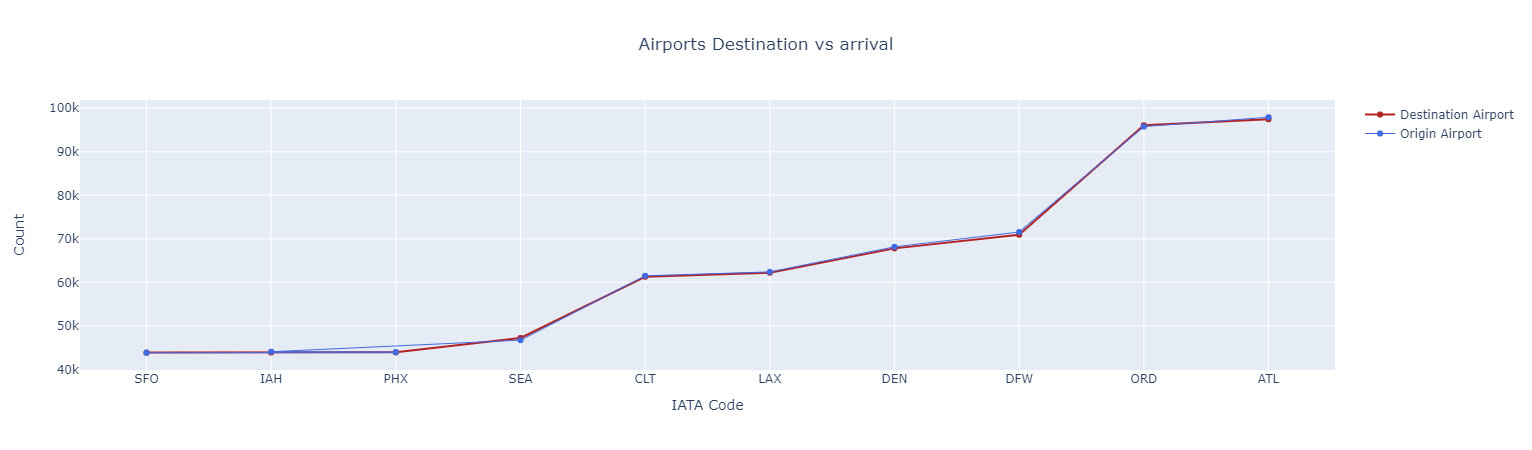

In [54]:
#Comparison of both origin & desination flights
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df_dest['dest'], y=df_dest['AggregateDest'], name='Destination Airport',
                         line=dict(color='firebrick', width=2)))
fig.add_trace(go.Scatter(x=df_Org['origin'], y=df_Org['AggregateOrigin'], name = 'Origin Airport',
                         line=dict(color='royalblue', width=1)))
fig.update_layout(uniformtext_minsize=4, uniformtext_mode='hide', title_text='Airports Destination vs arrival', title_x = 0.5)
fig.update_layout( yaxis=dict(title='Count'),xaxis=dict(title='IATA Code'))

#### Create a new DF which consists of the month, and day aggregated values for 2018, and 2019, which we then take the average of, to find the daily average delay

In [37]:
month_day = round(df.groupby(['month', 'day'])[['dep_delay']].mean(),2)

In [38]:
month_day.to_csv('monthday_dep_avgs.csv')

In [41]:
wkday_mean_total = round(df.groupby(['day_wk'])[['dep_delay']].mean(),2)

<AxesSubplot:xlabel='day_wk'>

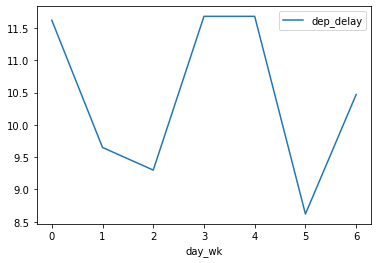

In [46]:
wkday_mean_total.plot()

#### Here we're creating df's to calculate the monthly mean and median total delay

In [49]:
monthly_mean_total = round(df.groupby(['month'])[['time_saved']].mean(),2)
monthly_med_total = df.groupby(['month'])[['time_saved']].median()

#### We can see that monthly mean and median  totals are fairly consistent throughout the year. 

In [51]:
monthly_mean_total

,time_saved
month,
1,5.80
2,4.89
3,5.55
4,5.17
5,4.77
6,4.14
7,4.75
8,4.30
9,5.13


In [109]:
monthly_med_total

,total_delay
month,
1,7.0
2,6.0
3,7.0
4,6.0
5,6.0
6,6.0
7,6.0
8,6.0
9,7.0


#### Here we're going to take a look at the departure delay, and the arrival delay, in a similar way as above

In [53]:
monthly_mean_dep = round(df.groupby(['month'])[['dep_delay']].mean(),2)
monthly_med_dep = df.groupby(['month'])[['dep_delay']].median()
monthly_mean_arr = round(df.groupby(['month'])[['arr_delay']].mean(),2)
monthly_med_arr = df.groupby(['month'])[['arr_delay']].median()

In [54]:
monthly_mean_dep

,dep_delay
month,
1,9.94
2,11.79
3,8.27
4,9.45
5,11.42
6,14.45
7,13.83
8,13.19
9,6.94


<AxesSubplot:xlabel='month'>

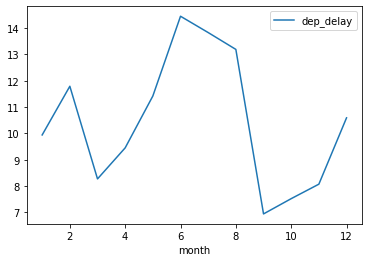

In [55]:
monthly_mean_dep.plot()

In [112]:
monthly_med_dep

,dep_delay
month,
1,-3.0
2,-2.0
3,-2.0
4,-3.0
5,-2.0
6,-1.0
7,-2.0
8,-2.0
9,-3.0


<AxesSubplot:xlabel='month'>

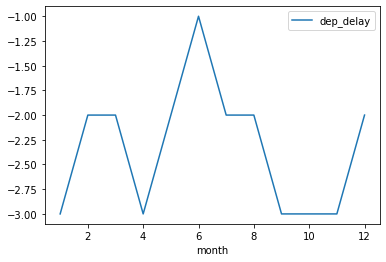

In [56]:
monthly_med_dep.plot()

In [113]:
monthly_mean_arr

,arr_delay
month,
1,4.14
2,6.90
3,2.72
4,4.27
5,6.66
6,10.31
7,9.08
8,8.89
9,1.81


<AxesSubplot:xlabel='month'>

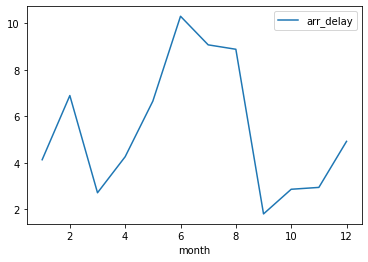

In [57]:
monthly_mean_arr.plot()

In [114]:
monthly_med_arr

,arr_delay
month,
1,-7.0
2,-6.0
3,-7.0
4,-7.0
5,-6.0
6,-4.0
7,-5.0
8,-5.0
9,-8.0


<AxesSubplot:xlabel='month'>

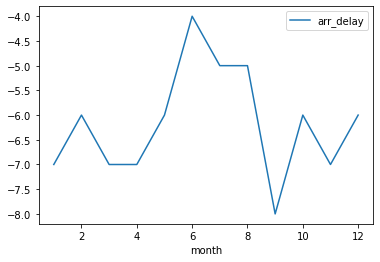

In [58]:
monthly_med_arr.plot()

- There doesn't seem to be much of a theme with the delays, other than with the means, they tend to be positive, likely due to the absurdly wide spread of data points within them

- Second, the 6 highest months of the year are February, May, June, July, August, and December 


In [59]:
df['dep_delay'].describe()

count    1.957769e+06
mean     1.048823e+01
std      4.765219e+01
min     -1.730000e+02
25%     -6.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      1.966000e+03
Name: dep_delay, dtype: float64

#### Next we're going to take a look at which states constitute the majority of the flights within the dataset

In [60]:
df['dep_state'] = df['origin_city_name'].astype(str).str[-2:]
df['arr_state'] = df['dest_city_name'].astype(str).str[-2:]

In [61]:
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,longest_add_gtime,no_name,total_delay,year,month,day,day_wk,time_saved,dep_state,arr_state
0,2019-11-11,WN,WN,WN,410,WN,N7842A,410,13495,MSY,...,NaN,NaN,10.0,2019,11,11,0,10.0,LA,CO
1,2019-11-11,WN,WN,WN,2149,WN,N420WN,2149,13495,MSY,...,NaN,NaN,10.0,2019,11,11,0,10.0,LA,MO


### After getting these into their own columns, we'll separate them out to their own DF so they're easier to work with.

In [62]:
states = df[['dep_state', 'arr_state']]

In [63]:
dep_arr = states.value_counts(normalize=True) * 100

### When combining the departure and arrival states, we can see the top routes that make up the flights in the dataset - 124 of them (about 10% of the total) account for 50% of all flights in the US

In [64]:
dep_arr

dep_state  arr_state
CA         CA           3.488256
TX         TX           2.522310
HI         HI           0.962626
CA         TX           0.898625
TX         CA           0.896786
                          ...   
SC         AL           0.000051
NV         AK           0.000051
MI         MT           0.000051
PR         MI           0.000051
CA         VA           0.000051
Length: 1383, dtype: float64

### We'll do something similar for the departure and arrival states

In [65]:
arr = states['arr_state'].value_counts(normalize=True) * 100
dep = states['dep_state'].value_counts(normalize=True) * 100

In [66]:
arr = arr.sort_values(ascending=False)
dep = dep.sort_values(ascending=False)

#### Specfiically, 8 departure states account for 50% of the total flights:
 - California
 - Texas
 - Florida
 - Illinois
 - Georgia
 - New York
 - North Carolina
 - Colorado

In [67]:
dep.cumsum()

CA     10.994964
TX     20.859305
FL     28.100813
IL     34.353083
GA     39.701466
NY     44.848447
NC     49.449552
CO     53.366153
DC     56.342858
PA     59.293921
WA     62.196613
MI     65.023708
AZ     67.629378
NV     70.032164
OH     72.296425
MN     74.467110
NJ     76.526138
MA     78.469932
MO     80.306308
TN     82.060447
UT     83.651544
HI     85.190234
OR     86.626870
MD     87.960428
LA     89.044877
VA     90.009138
IN     90.924261
WI     91.817523
SC     92.686011
OK     93.249152
AL     93.798758
AK     94.321904
KY     94.840096
NE     95.261698
ID     95.682943
AR     96.096628
NM     96.495143
CT     96.885077
IA     97.266378
MT     97.640580
PR     98.003901
ND     98.272626
ME     98.530777
RI     98.786067
KS     98.998809
MS     99.193827
SD     99.387619
NH     99.538148
VT     99.681066
WY     99.814585
WV     99.920930
VI     99.973337
TT    100.000000
Name: dep_state, dtype: float64

#### A similar 8 states account for 50% of the arrivals:
 - California
 - Texas
 - Florida
 - Illinois
 - Georgia
 - New York
 - North Carolina
 - Colorado

In [68]:
arr.cumsum()

CA     10.961354
TX     20.808635
FL     28.090852
IL     34.341386
GA     39.670411
NY     44.789758
NC     49.391067
CO     53.292957
PA     56.258220
DC     59.215975
WA     62.137464
MI     64.966909
AZ     67.571915
NV     69.973066
OH     72.245449
MN     74.416543
NJ     76.458254
MA     78.402866
MO     80.254157
TN     82.012382
UT     83.621459
HI     85.164797
OR     86.603169
MD     87.959049
LA     89.035121
VA     89.997492
IN     90.901838
WI     91.800207
SC     92.663026
OK     93.238273
AL     93.787061
AK     94.307960
KY     94.817060
NE     95.238713
ID     95.658885
AR     96.070170
NM     96.471136
IA     96.866280
CT     97.257184
MT     97.643440
PR     98.004514
ND     98.269203
ME     98.531441
RI     98.786680
KS     99.000086
SD     99.194747
MS     99.387721
VT     99.536922
NH     99.683466
WY     99.816526
WV     99.919143
VI     99.973490
TT    100.000000
Name: arr_state, dtype: float64

#### Here we're labeling what type of flight each one is:
- Short Haul = 0-699
- Medium Haul = 700-2,199
- Long Haul = 2,200 - 10,000

In [58]:
df['cat'] = pd.cut(df['distance'], [0,699,2199,10000], labels=['short', 'medium', 'long'])

In [59]:
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,time_saved,year,month,day,day_wk,cat
0,2019-11-11,WN,WN,WN,410,WN,N7842A,410,13495,MSY,...,NaN,NaN,NaN,NaN,10.0,2019,11,11,0,medium
1,2019-11-11,WN,WN,WN,2149,WN,N420WN,2149,13495,MSY,...,NaN,NaN,NaN,NaN,10.0,2019,11,11,0,short


In [60]:
categories = df['cat']

#### Our percentages for our categories are as follows:
    - Short Haul flights account for 57.51%
    - Medium Haul flights account for 38.06%
    - Long Haul flights account for 4.43%

<AxesSubplot:ylabel='cat'>

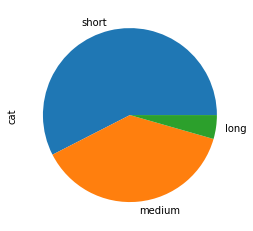

In [64]:
(categories.value_counts(normalize=True)*100).plot(kind='pie')

In [62]:
categories

0          medium
1           short
2           short
3            long
4          medium
            ...  
1997825     short
1997826     short
1997827     short
1997828     short
1997829     short
Name: cat, Length: 1957769, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']